# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [127]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [129]:
data_train = pd.read_csv('../input/advanced-dls-spring-2021/train.csv')
data_test = pd.read_csv('../input/advanced-dls-spring-2021/test.csv')
sub = pd.read_csv('../input/advanced-dls-spring-2021/submission.csv')

Смотрим на данные с которыми будем работать (data_train)

In [130]:
data_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


В данных присутствуют как численные так и категориальные признаки

In [131]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим есть ли пустые строчки с помощью info() и describe()


In [132]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [133]:
data_train.describe(include = "all")

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,4978,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,9,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,NaN,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,NaN,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Пустых значений нет...
Посмотрим на типы колонок

In [134]:
data_train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Можно заметить, что TotalSpent имеет тип object, хотя должен быть float64

In [144]:
data_train['TotalSpent'].value_counts()

           9
20.2       9
19.75      8
20.05      6
19.65      6
          ..
41.85      1
4326.25    1
950.2      1
4264       1
1375.6     1
Name: TotalSpent, Length: 4978, dtype: int64

Оказалось что в TotalSpent содержатся 9 пропусков

In [145]:
data_train['TotalSpent'].value_counts()[0]/len(data_train['TotalSpent'])

0.0017039000378644452

Это 0.17% всего тренировочного датасета, заменим эти значения нулями

In [146]:
data_train["TotalSpent"] = pd.to_numeric(data_train["TotalSpent"], errors='coerce').fillna(0)
data_test["TotalSpent"] = pd.to_numeric(data_test["TotalSpent"], errors='coerce').fillna(0)

Посмотрим корреляцию

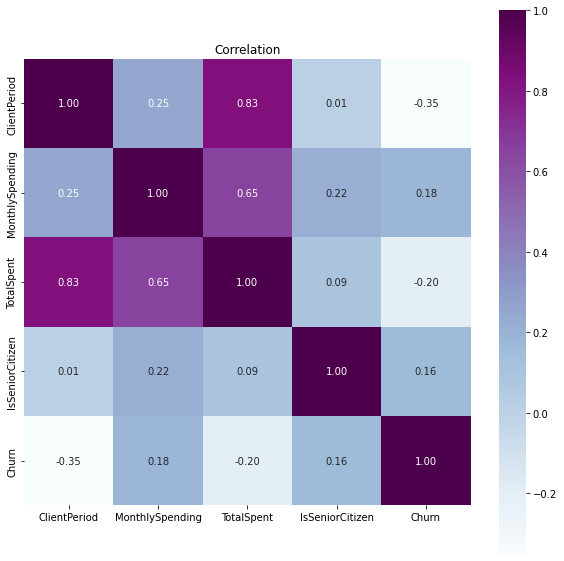

In [149]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr(), cbar=True, annot=True, cmap="BuPu", square=True, fmt='.2f', annot_kws={'size': 10}).set_title("Correlation")
plt.show()

In [ ]:
Видим корреляцию между TotalSpent и ClientPeriod, TotalSpent и MonthlySpending

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим гистограммы для численных признаков

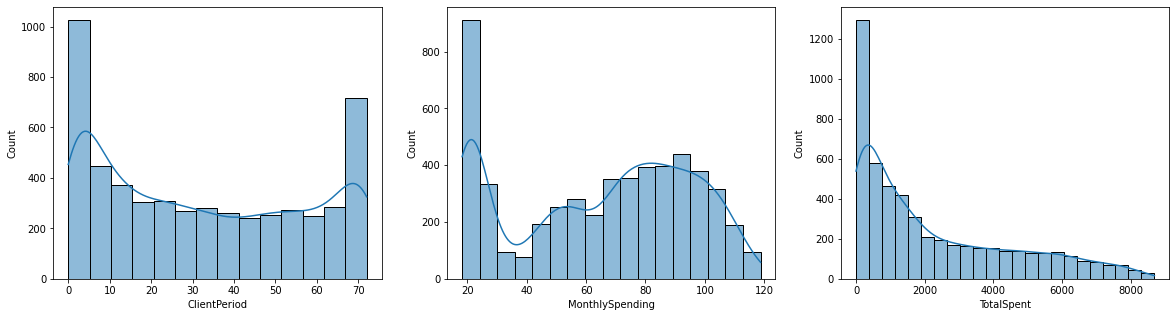

In [161]:

fig, axes = plt.subplots(1, 3,figsize=(20,5))
for i in range(len(num_cols)):
    sns.histplot(ax = axes[i], data=data_train[num_cols[i]], kde=True)

И круговые диаграммы для категориальных признаков

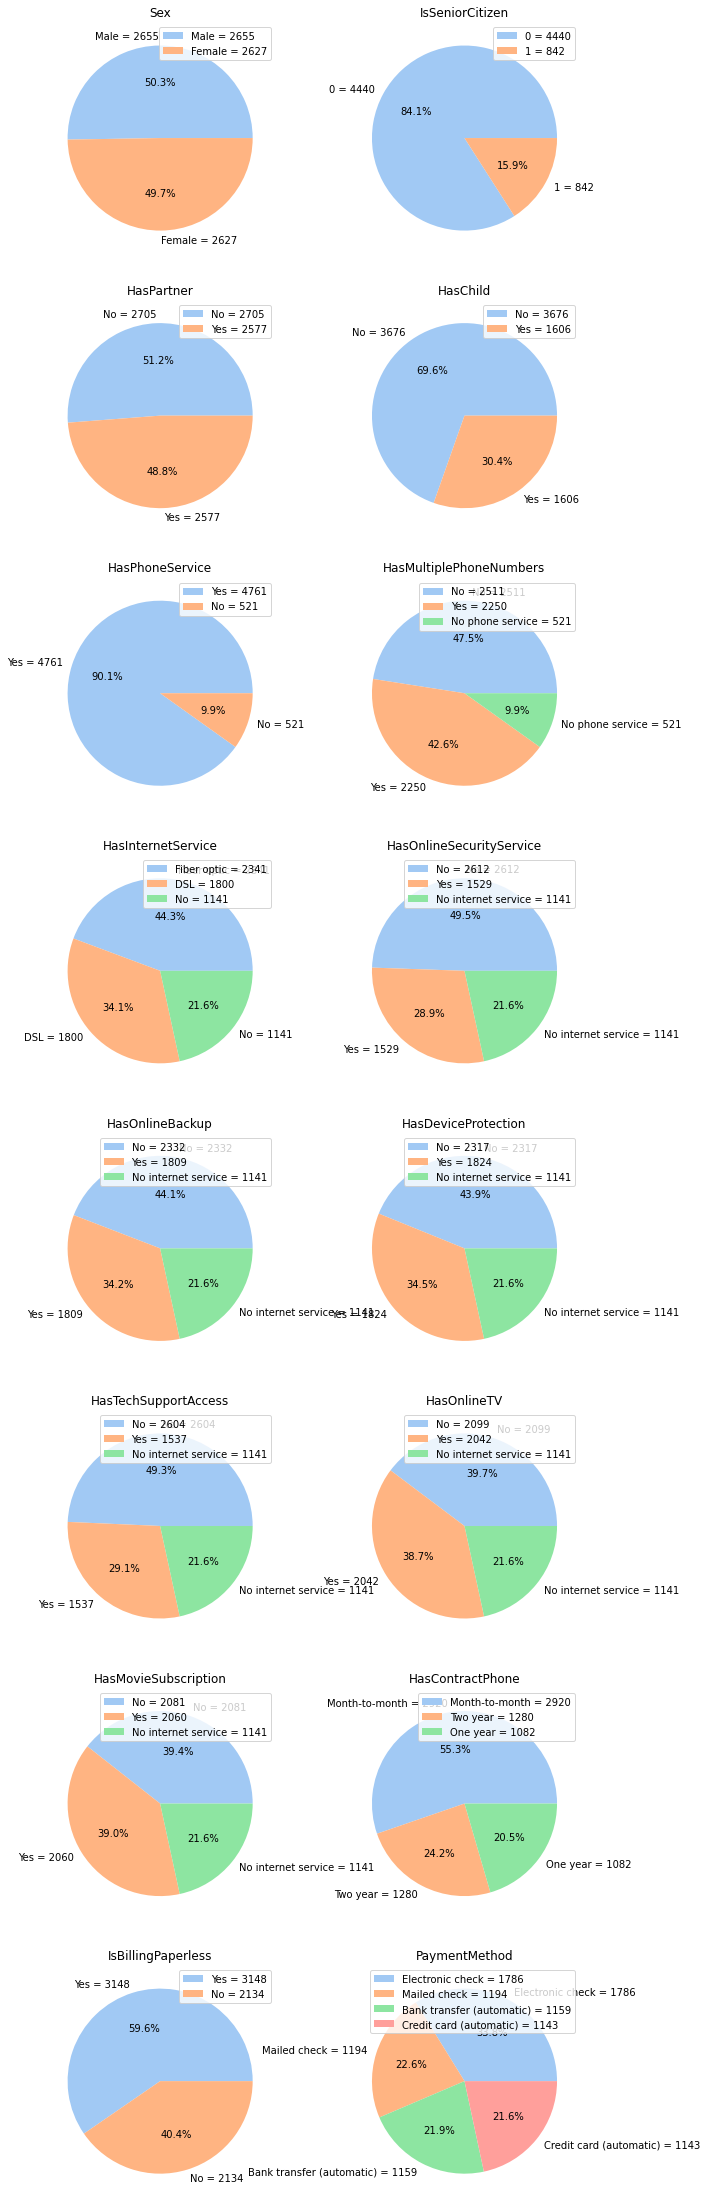

In [171]:
plt.figure(figsize = (10, 40))
colors = sns.color_palette('pastel')[0:5]
for id, cat in enumerate(cat_cols):
    ax = plt.subplot(8, 2, id + 1)
    data = data_train[cat].value_counts()
    labels_ = ((data_train[cat].value_counts().index).astype(str )+ ' = ' + data.astype(str))
    plt.pie(data, labels = labels_, autopct='%1.1f%%', colors = colors)
    plt.title(cat)
    plt.legend()

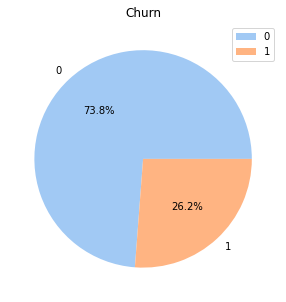

In [172]:
data_train[target_col].value_counts()
plt.figure(figsize = (5, 5))
plt.pie(data_train[target_col].value_counts(), labels = (data_train[target_col].value_counts().index).astype(str), autopct='%1.1f%%', colors = colors)
plt.title(target_col)
plt.legend()

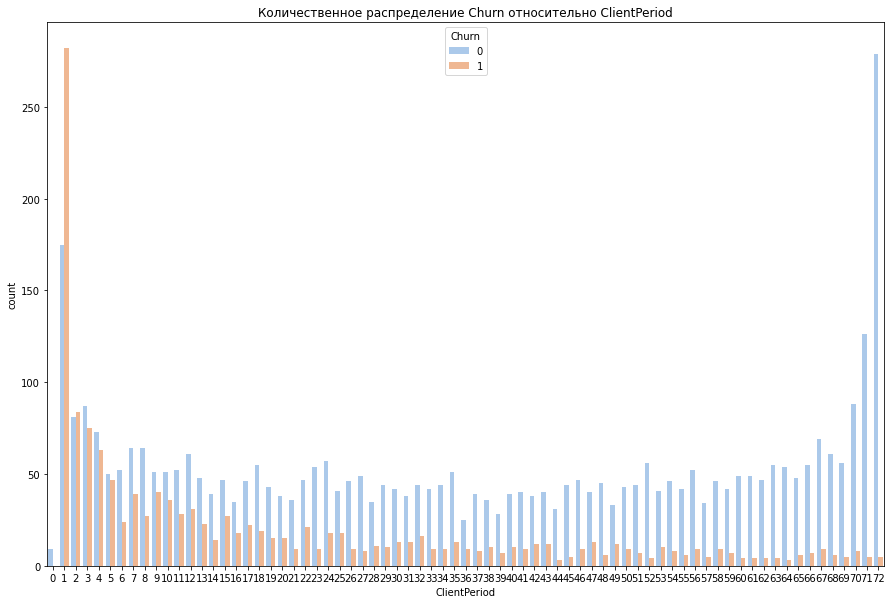

In [175]:
plt.figure(figsize=(15, 10))
sns.countplot(data=data_train, x='ClientPeriod', hue='Churn', palette = 'pastel').set_title('Количественное распределение Churn относительно ClientPeriod')
None

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [176]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [177]:
data_train_lr = data_train.copy(deep=True)
data_test_lr = data_test.copy(deep=True)
label = data_train_lr.copy().pop('Churn')

In [178]:
cat_cols = data_train.dtypes[data_train.dtypes == 'object'].keys()
num_cols = data_train.dtypes[data_train.dtypes != 'object'].keys()
num_cols = num_cols.drop('Churn')

In [179]:
scaler = StandardScaler()


In [180]:
data_train_lr_scaled = scaler.fit_transform(data_train_lr[num_cols])
data_test_lr_scaled = scaler.transform(data_test_lr[num_cols])

In [181]:
data_train_lr_dummy = pd.concat([pd.DataFrame(columns=num_cols, data=data_train_lr_scaled), pd.get_dummies(data_train_lr[cat_cols]).reset_index(drop=True)], axis=1)
data_test_lr_dummy = pd.concat([pd.DataFrame(columns=num_cols, data=data_test_lr_scaled), pd.get_dummies(data_test_lr[cat_cols]).reset_index(drop=True)], axis=1)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(data_train_lr_dummy, label, test_size=0.15)

In [183]:
lr = LogisticRegression()

params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']
}

lr_grid = GridSearchCV(lr, params, cv=5, scoring='roc_auc', n_jobs=-1)

lr_grid.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='roc_auc')

In [184]:
print('Лучшие параметры модели LogisticRegression по результатам кросс-валидации / поиска по сетке:')
lr_grid.best_params_

Лучшие параметры модели LogisticRegression по результатам кросс-валидации / поиска по сетке:


{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

In [185]:
print(f'Результат на отложенной выборке: {roc_auc_score(y_test, lr_grid.predict_proba(X_test)[:, 1])}')

Результат на отложенной выборке: 0.8492085289124137


In [186]:
sub.Churn = lr_grid.predict_proba(data_test_lr_dummy)[:, 1]

sub.to_csv('./submission_log_reg.csv', index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [187]:
data_train_catboost = data_train_lr.copy()

cols = data_train_catboost.keys()
cols = cols.drop('Churn')

X_train, X_test, y_train, y_test = train_test_split(data_train_catboost[cols], label, test_size=0.15)

cat_cols = data_train.dtypes[data_train.dtypes == 'object'].keys()
num_cols = data_train.dtypes[data_train.dtypes != 'object'].keys()
num_cols = num_cols.drop('Churn')

In [188]:
from catboost import CatBoostClassifier
init_model = CatBoostClassifier()

init_model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          cat_features=cat_cols.values)

print(f'Результат на валидационной выборке для модели по умолчанию: {roc_auc_score(y_test, init_model.predict_proba(X_test)[:, 1])}')

Learning rate set to 0.045919
0:	learn: 0.6667959	test: 0.6660506	best: 0.6660506 (0)	total: 12.8ms	remaining: 12.8s
1:	learn: 0.6412205	test: 0.6393883	best: 0.6393883 (1)	total: 23.8ms	remaining: 11.9s
2:	learn: 0.6158603	test: 0.6128344	best: 0.6128344 (2)	total: 34.1ms	remaining: 11.3s
3:	learn: 0.5947461	test: 0.5912780	best: 0.5912780 (3)	total: 45.5ms	remaining: 11.3s
4:	learn: 0.5753834	test: 0.5712216	best: 0.5712216 (4)	total: 56ms	remaining: 11.1s
5:	learn: 0.5604217	test: 0.5557583	best: 0.5557583 (5)	total: 64.9ms	remaining: 10.8s
6:	learn: 0.5452987	test: 0.5403284	best: 0.5403284 (6)	total: 75.4ms	remaining: 10.7s
7:	learn: 0.5318479	test: 0.5264794	best: 0.5264794 (7)	total: 86.3ms	remaining: 10.7s
8:	learn: 0.5197362	test: 0.5136905	best: 0.5136905 (8)	total: 95.7ms	remaining: 10.5s
9:	learn: 0.5090407	test: 0.5024049	best: 0.5024049 (9)	total: 106ms	remaining: 10.5s
10:	learn: 0.5007399	test: 0.4934756	best: 0.4934756 (10)	total: 114ms	remaining: 10.2s
11:	learn: 0.49

In [118]:
model = CatBoostClassifier(iterations=1000,
                              depth=5,
                              learning_rate=0.02,
                              l2_leaf_reg=5,
                              custom_loss='AUC',
                              thread_count=4,
                              bagging_temperature=1,
                              use_best_model=True)

model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          cat_features=cat_cols.values,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6807583	test: 0.6798405	best: 0.6798405 (0)	total: 11ms	remaining: 11s
1:	learn: 0.6686832	test: 0.6666354	best: 0.6666354 (1)	total: 18.7ms	remaining: 9.31s
2:	learn: 0.6574011	test: 0.6543449	best: 0.6543449 (2)	total: 27.2ms	remaining: 9.05s
3:	learn: 0.6471044	test: 0.6431602	best: 0.6431602 (3)	total: 35.4ms	remaining: 8.82s
4:	learn: 0.6372626	test: 0.6321833	best: 0.6321833 (4)	total: 43.6ms	remaining: 8.67s
5:	learn: 0.6277121	test: 0.6218625	best: 0.6218625 (5)	total: 51.8ms	remaining: 8.59s
6:	learn: 0.6198635	test: 0.6131779	best: 0.6131779 (6)	total: 59.7ms	remaining: 8.47s
7:	learn: 0.6099722	test: 0.6028951	best: 0.6028951 (7)	total: 68.4ms	remaining: 8.49s
8:	learn: 0.6015342	test: 0.5933976	best: 0.5933976 (8)	total: 75.7ms	remaining: 8.34s
9:	learn: 0.5930294	test: 0.5839201	best: 0.5839201 (9)	total: 83.5ms	remaining: 8.26s
10:	learn: 0.5853243	test: 0.5756094	best: 0.5756094 (10)	total: 91.3ms	remaining: 8.21s
11:	learn: 0.5782673	test: 0.5680919	best: 0.

In [189]:
print(f'Результат на валидационной выборке: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}')

Результат на валидационной выборке: 0.8698483931692887


In [190]:
sub.Churn = model.predict_proba(data_test)[:, 1]

sub.to_csv('./submission_catboost.csv', index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

Лучшей моделью оказалась логическая регрессия с точностью на тестовой выборке 0.86077

In [191]:
best_model = model

In [192]:
X_test = pd.read_csv('../input/advanced-dls-spring-2021/test.csv')
submission = pd.read_csv('../input/advanced-dls-spring-2021/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)
submission.to_csv('../my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.